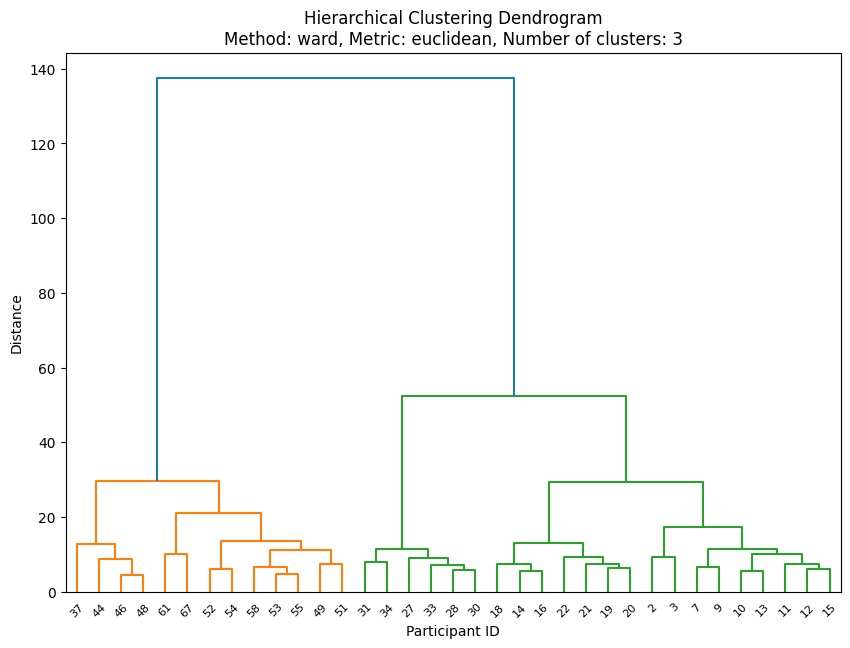

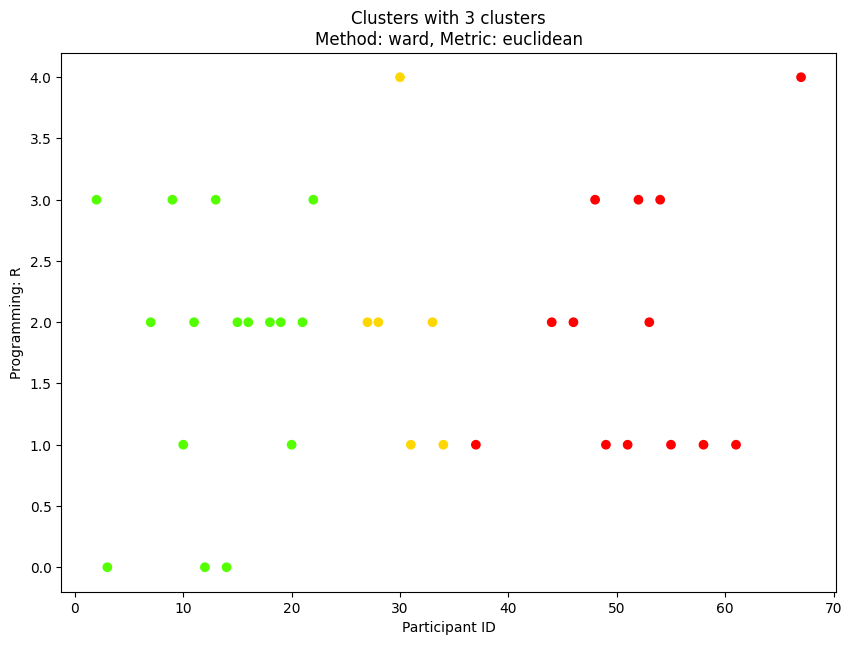

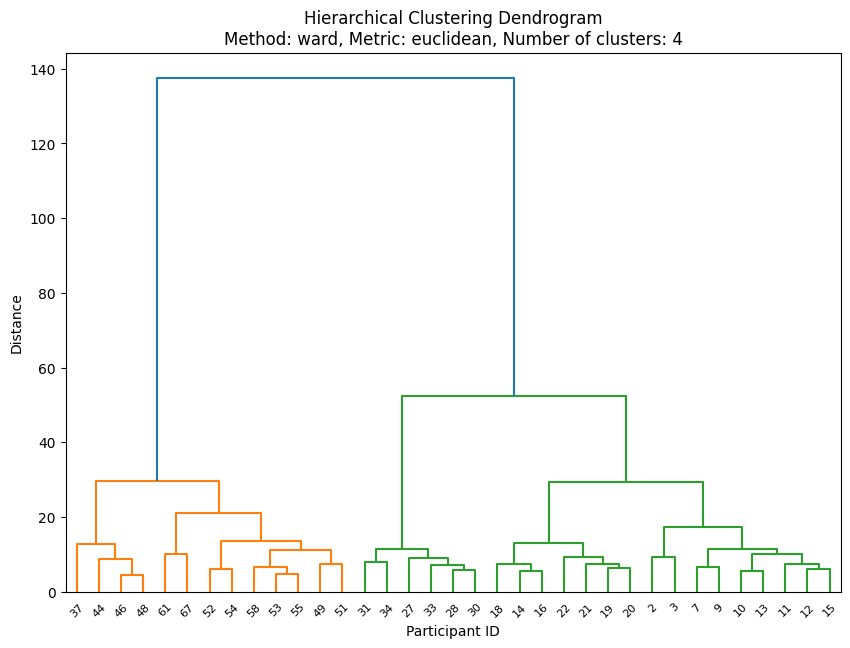

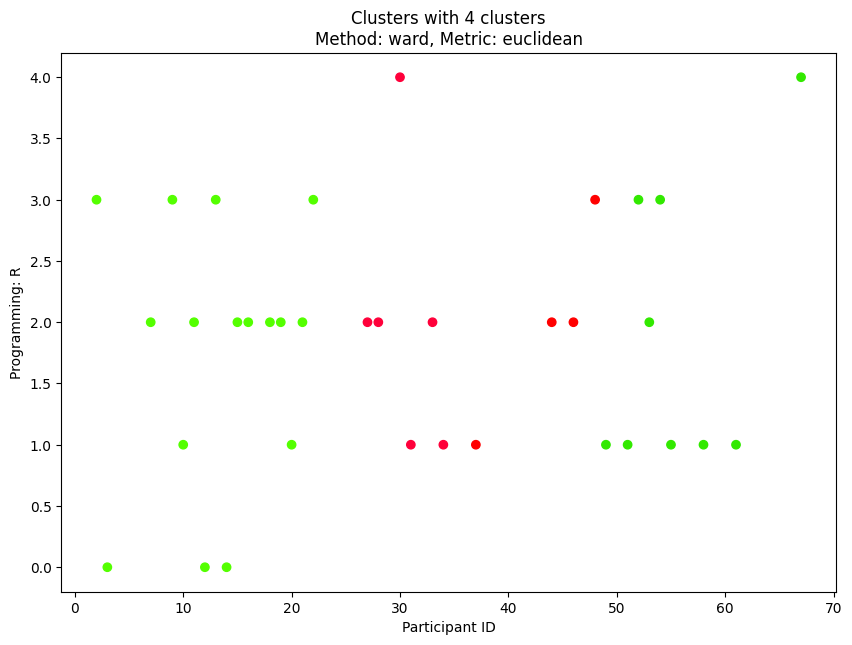

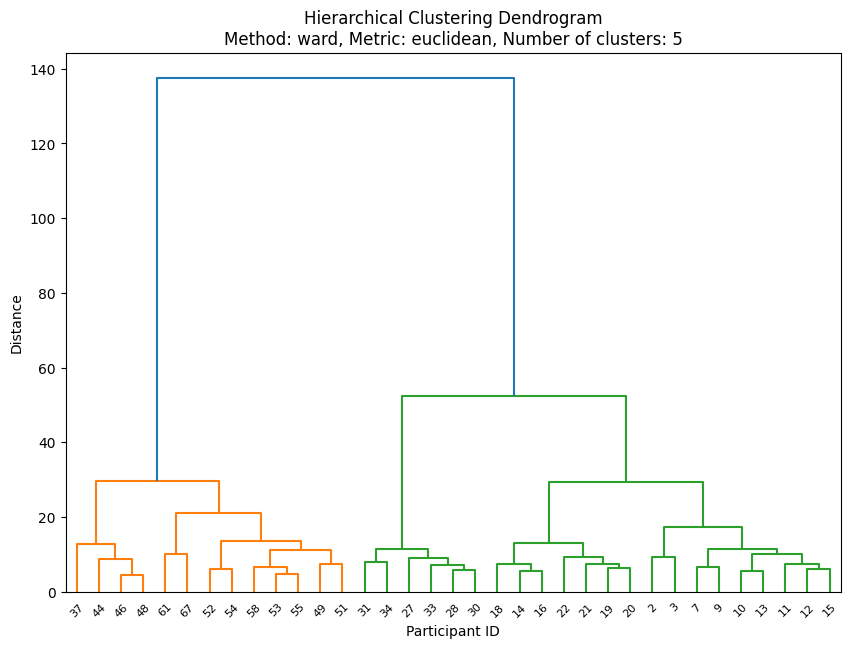

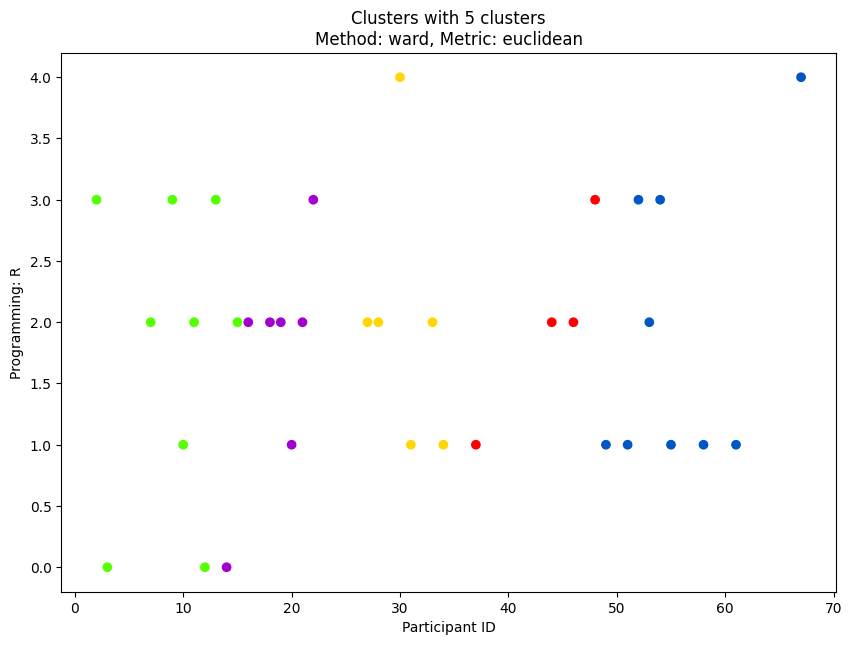

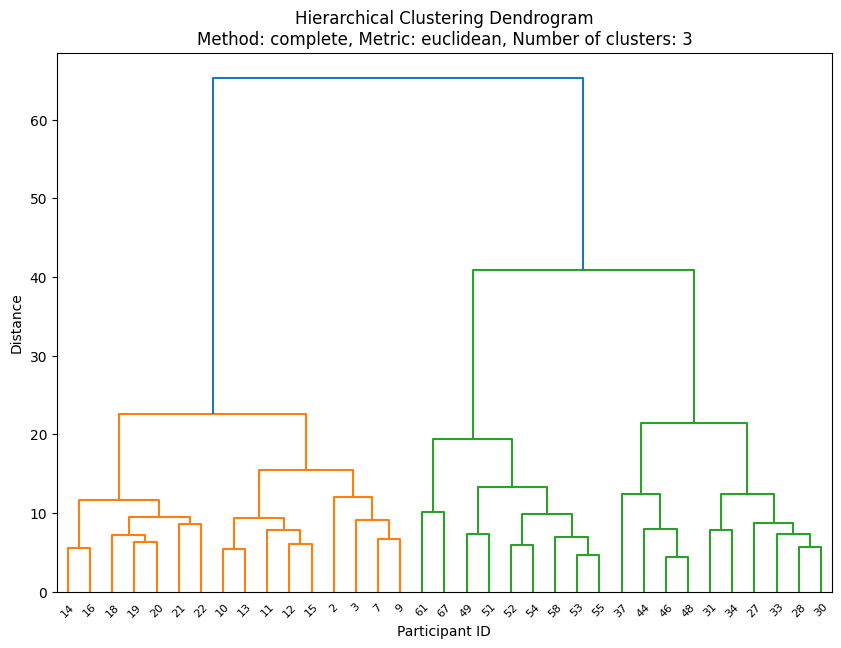

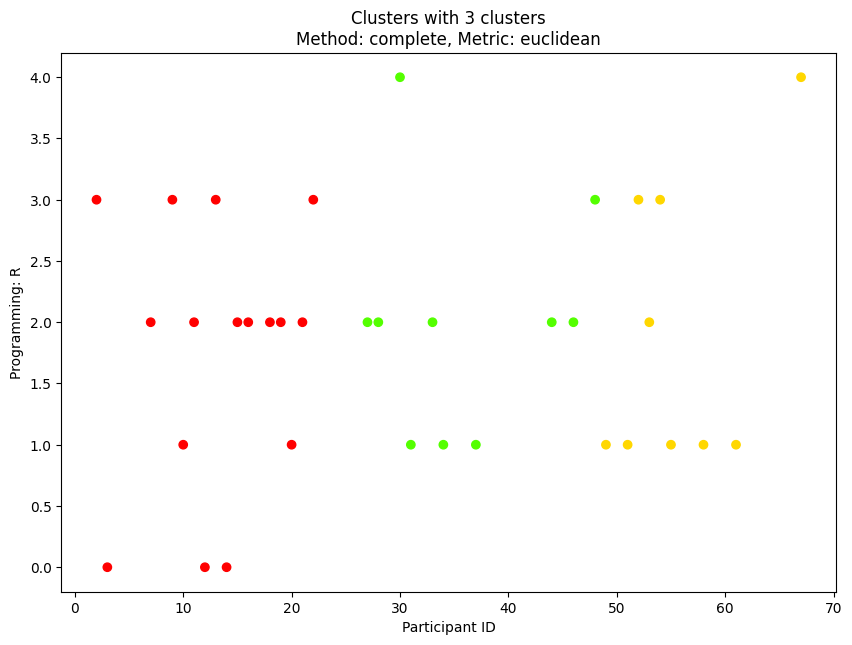

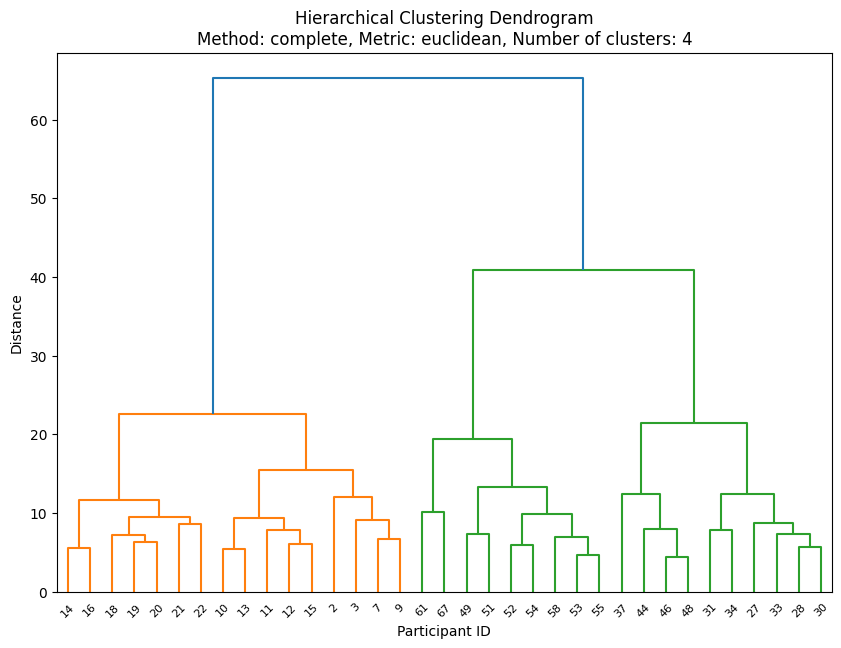

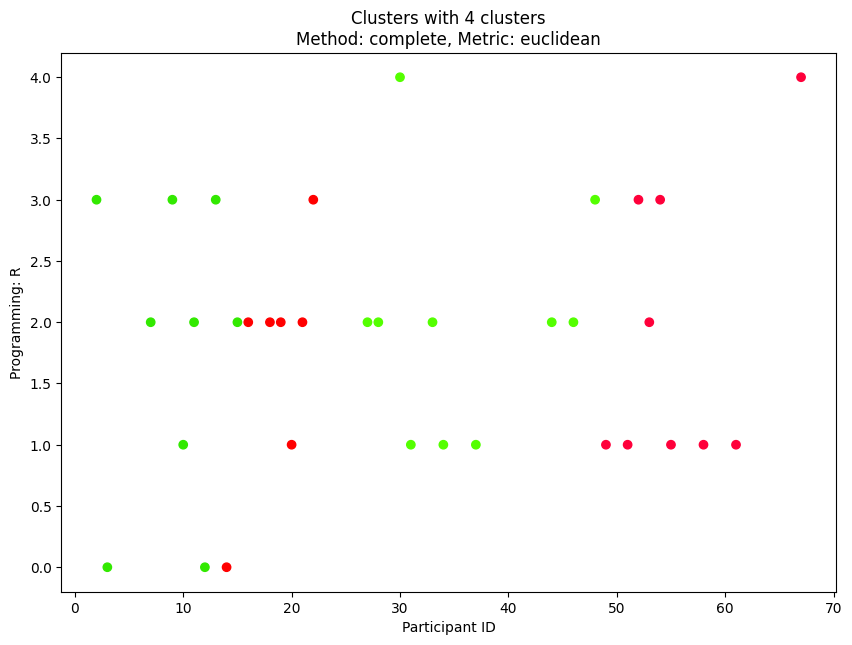

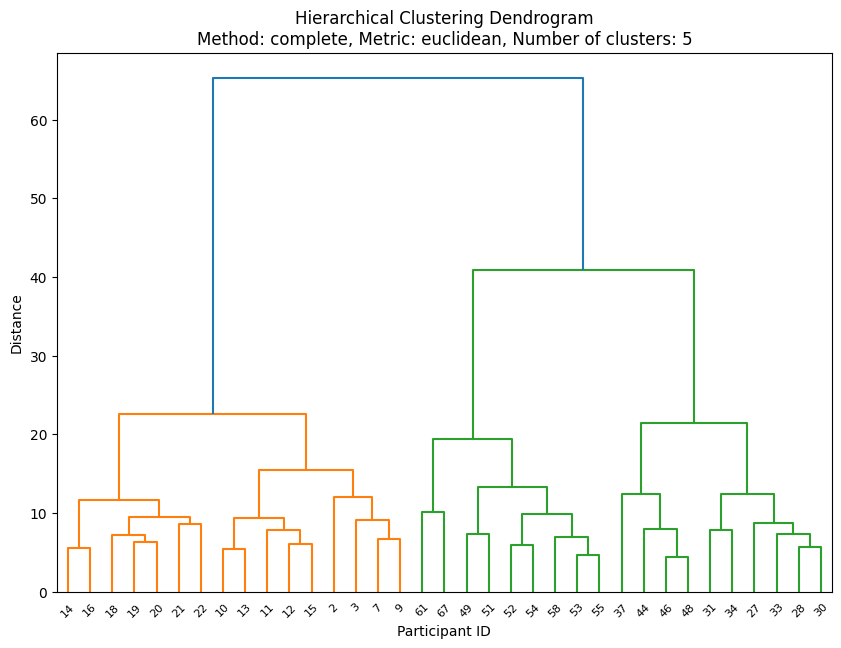

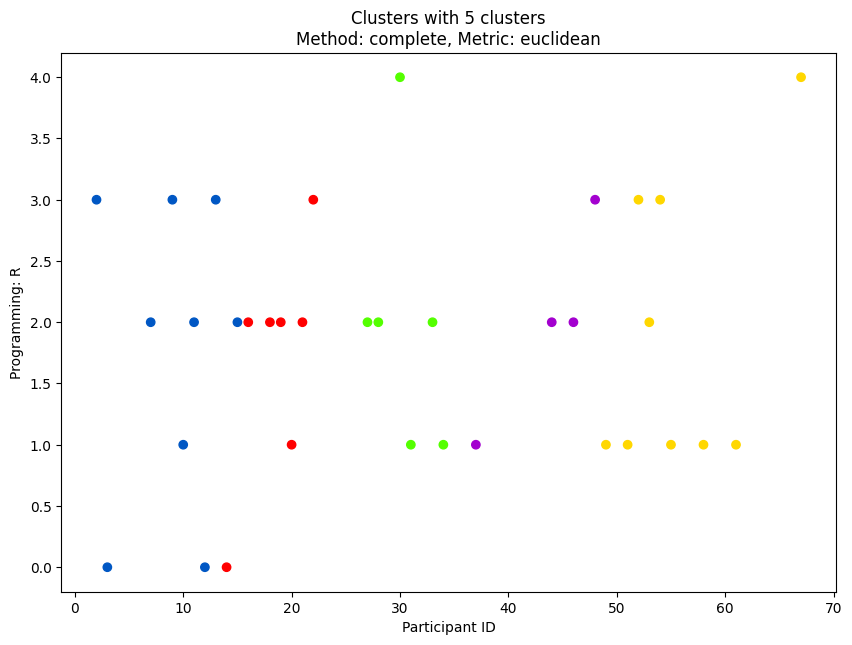

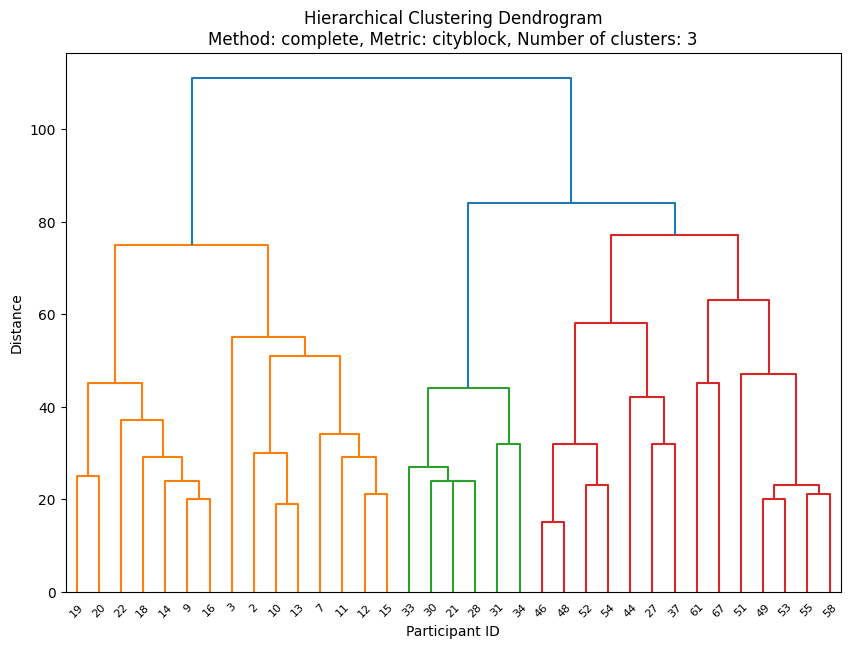

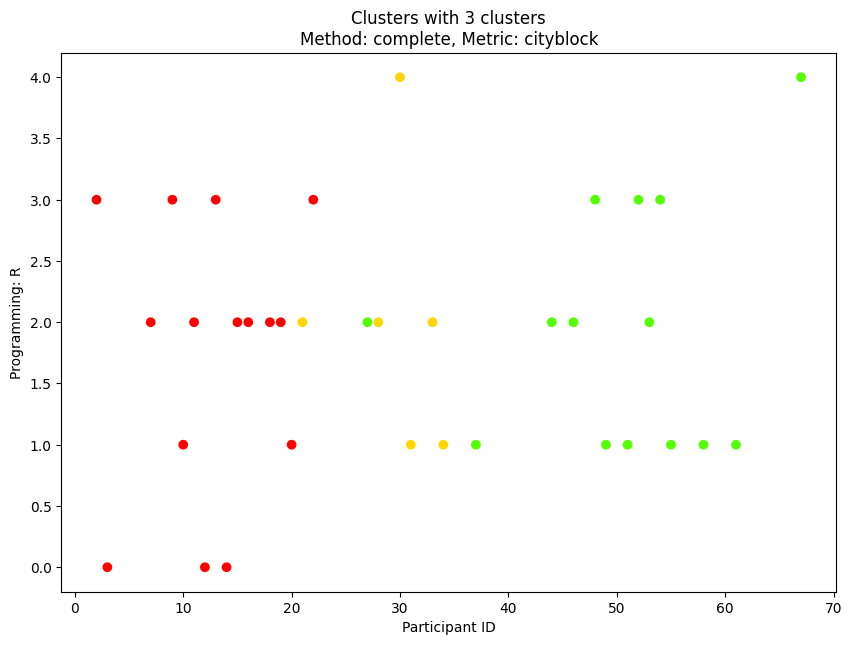

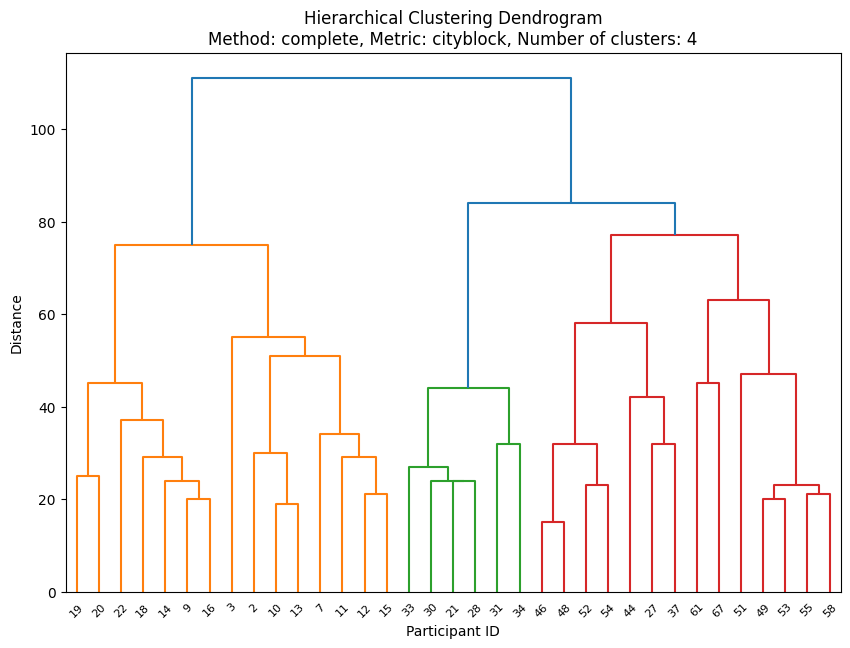

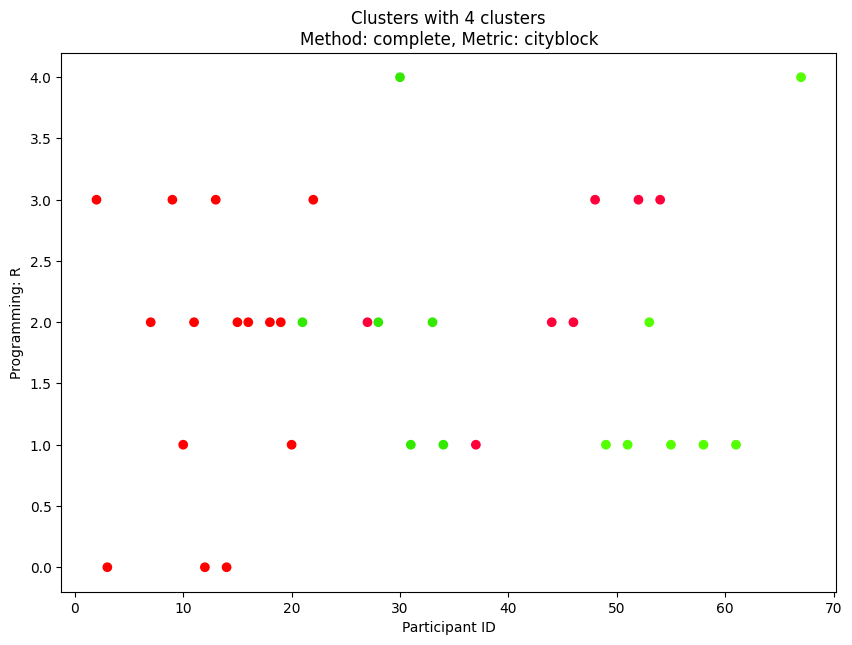

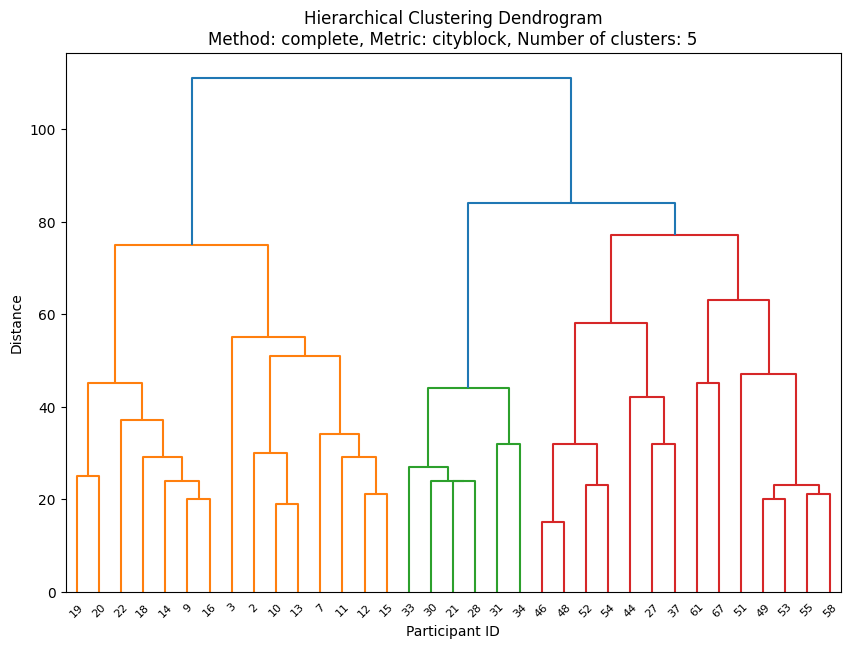

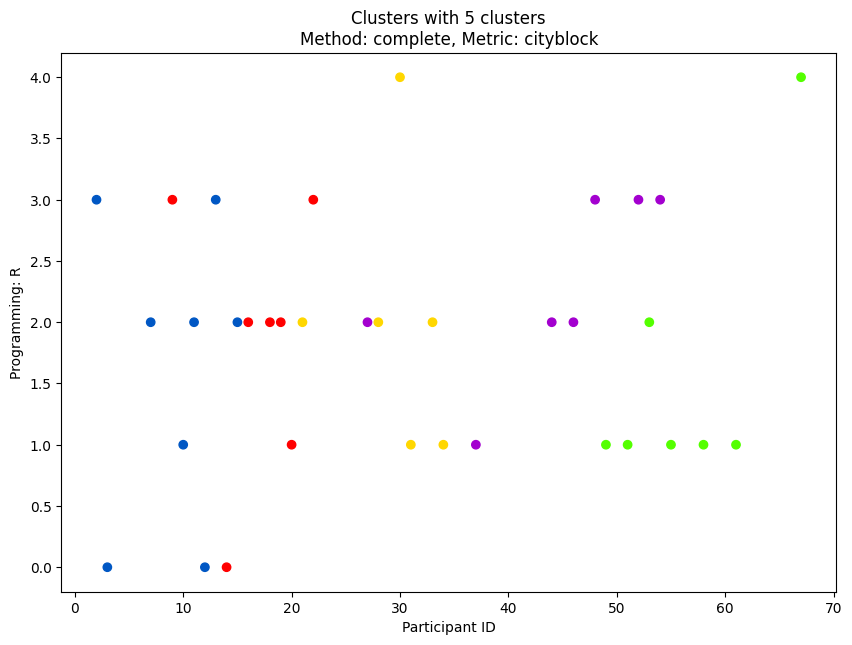

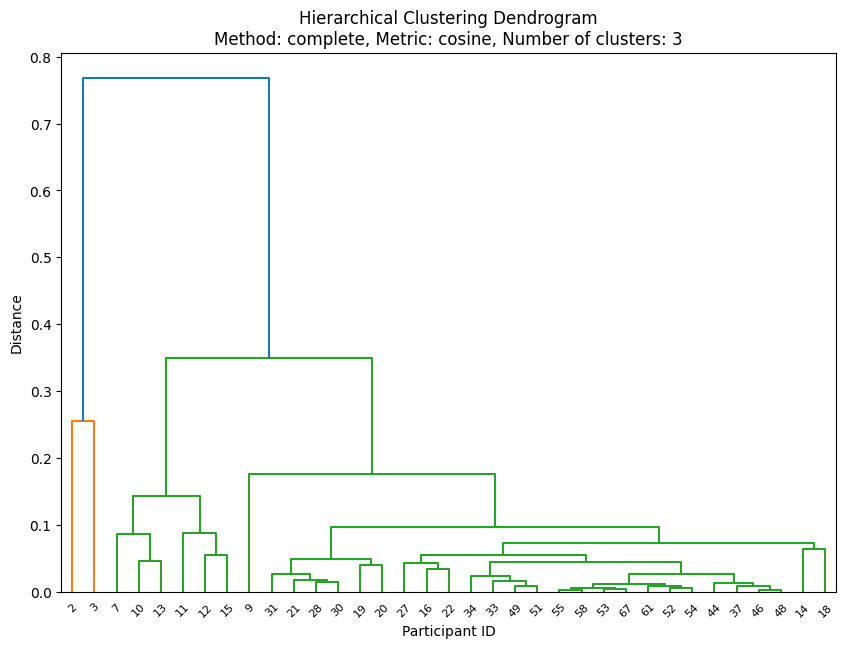

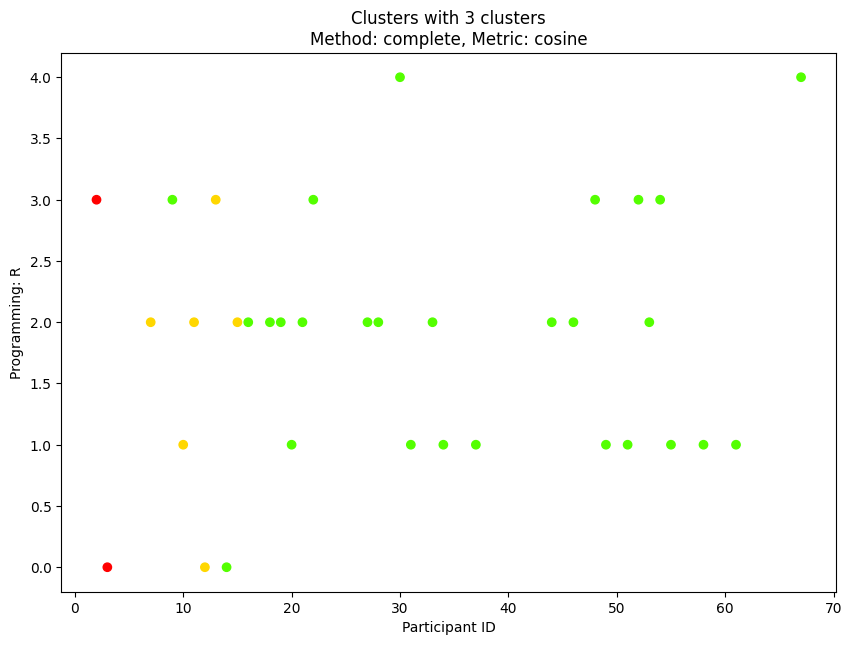

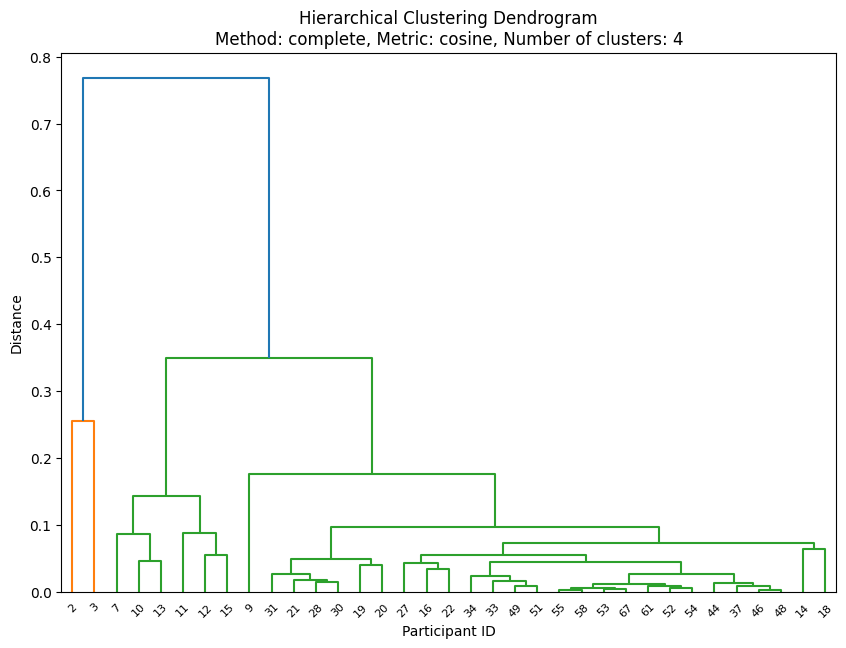

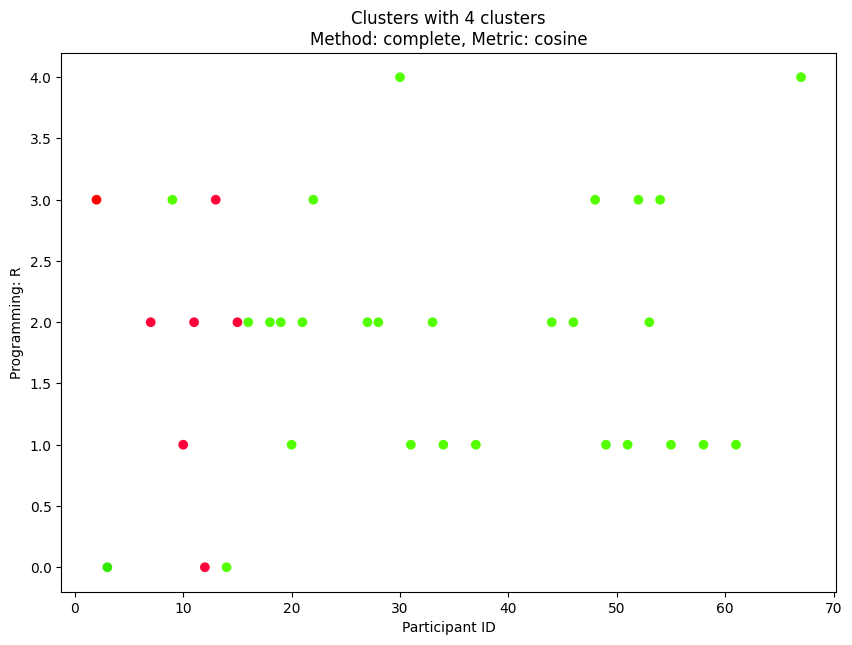

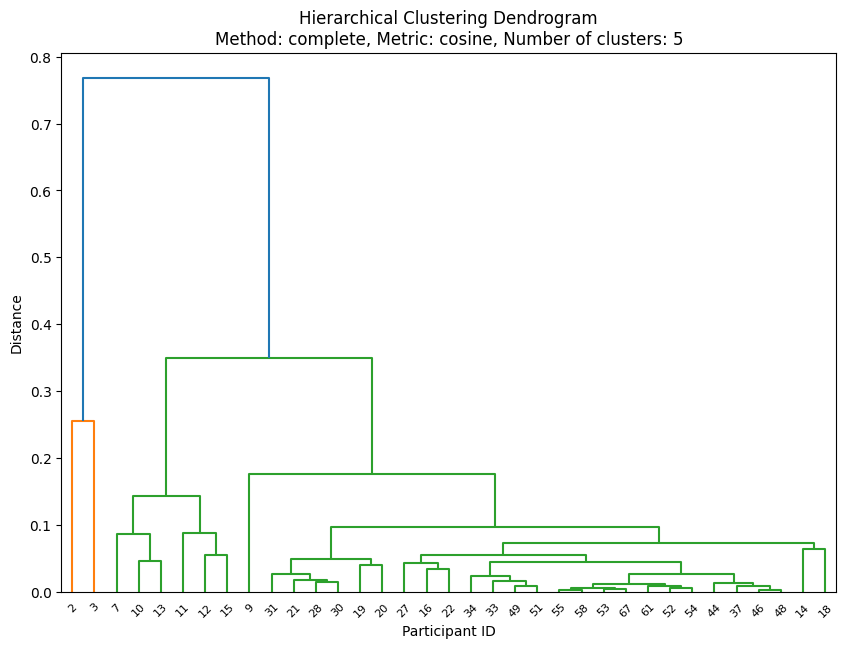

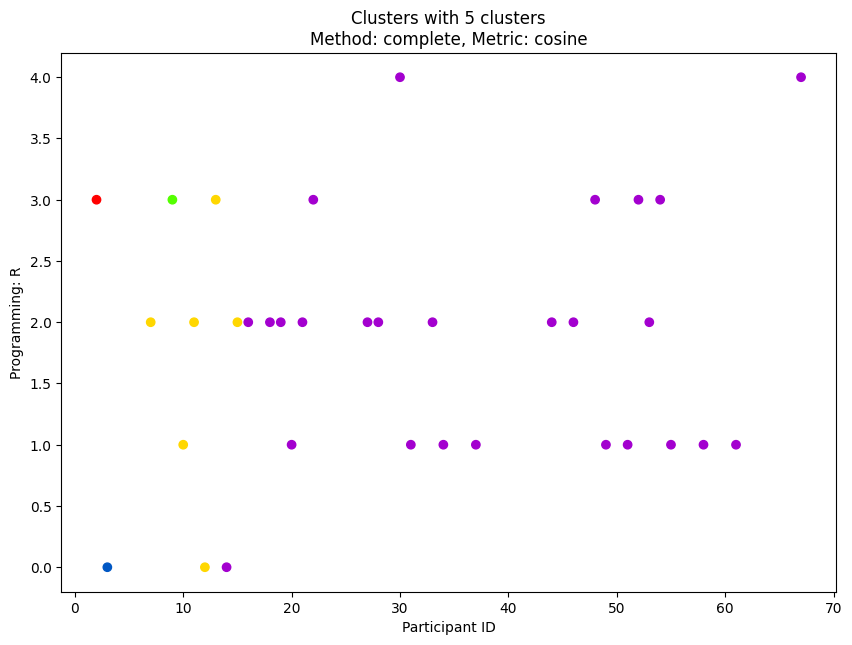

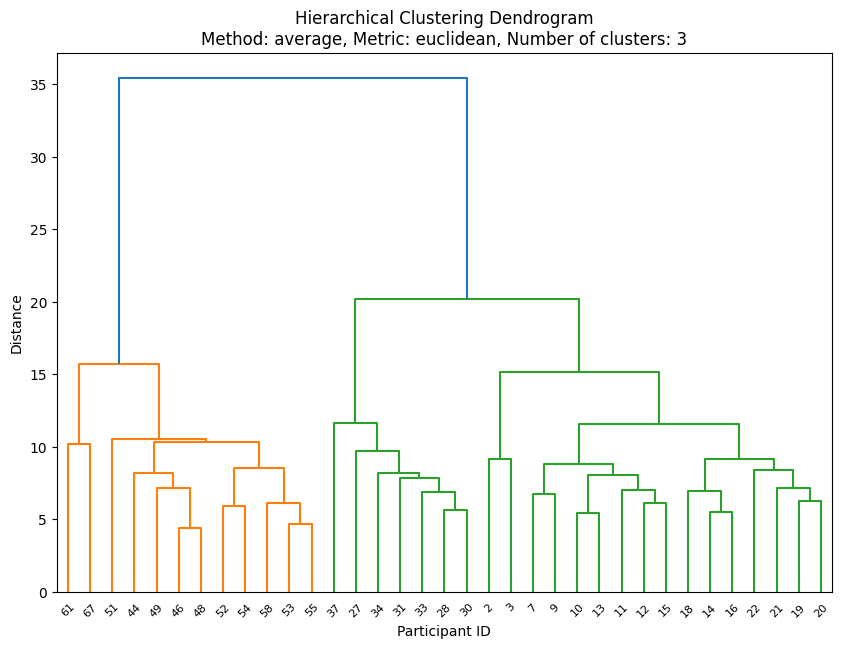

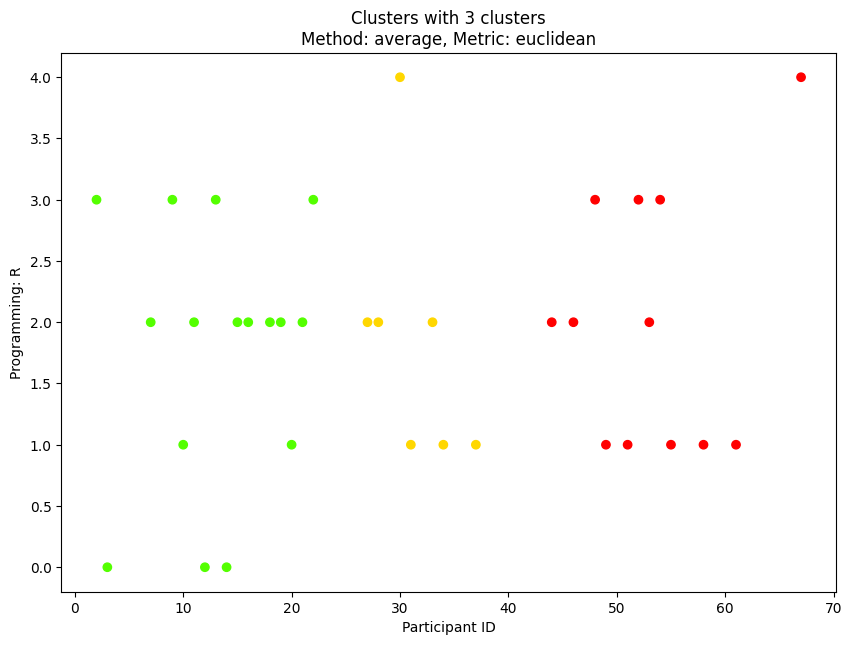

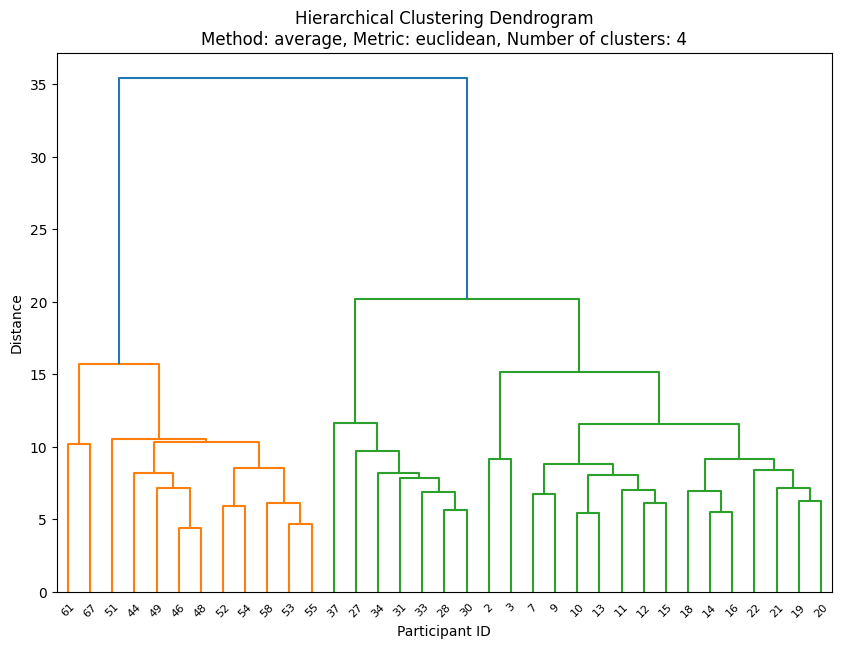

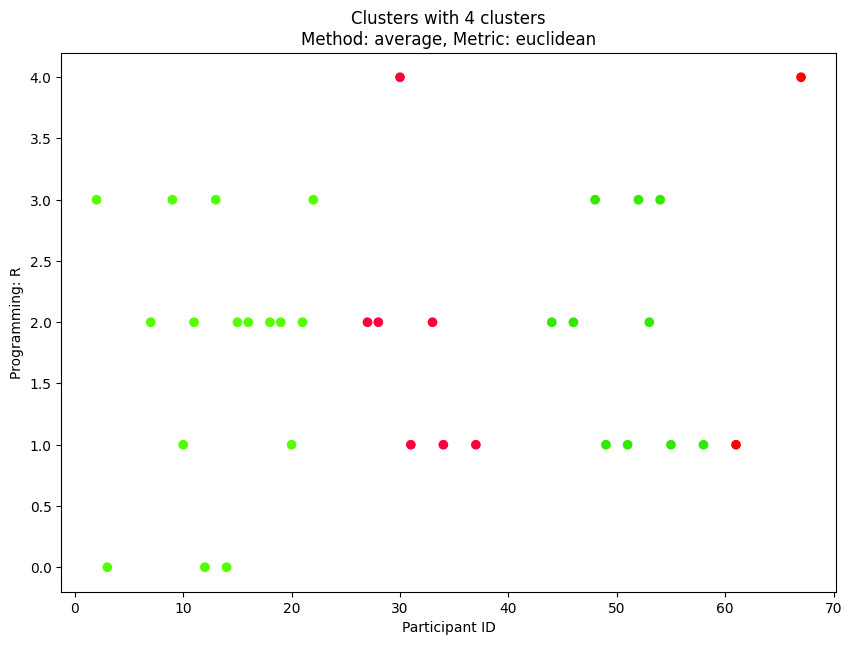

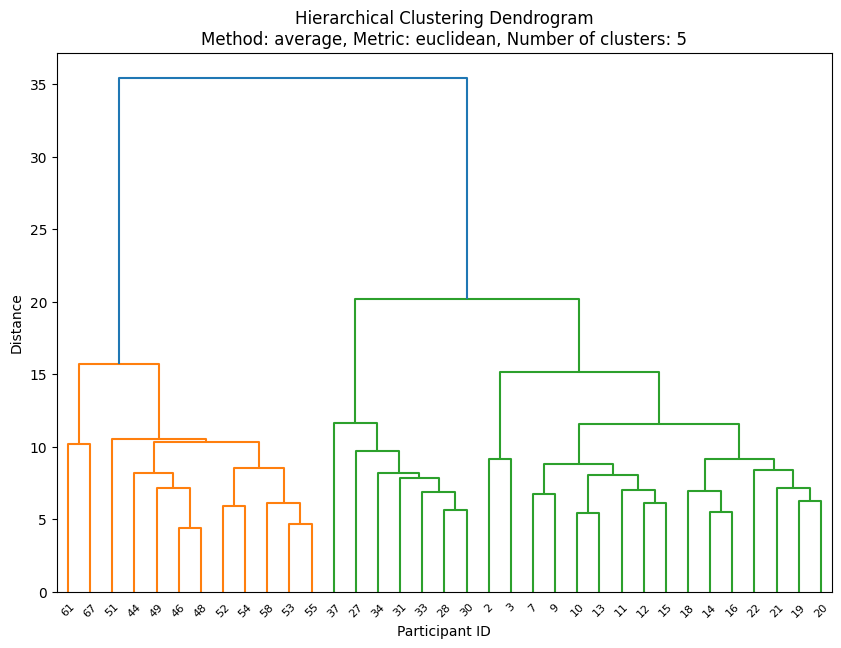

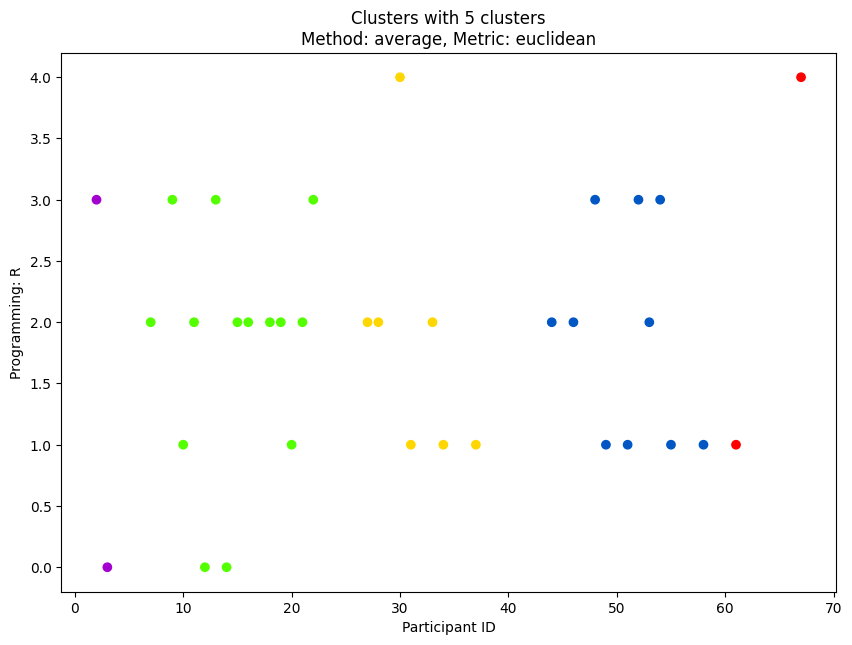

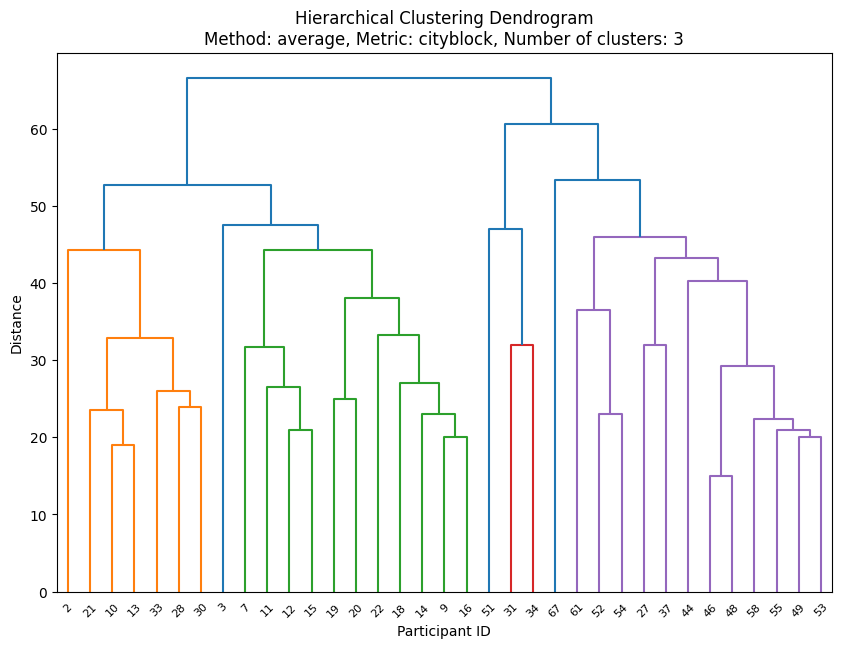

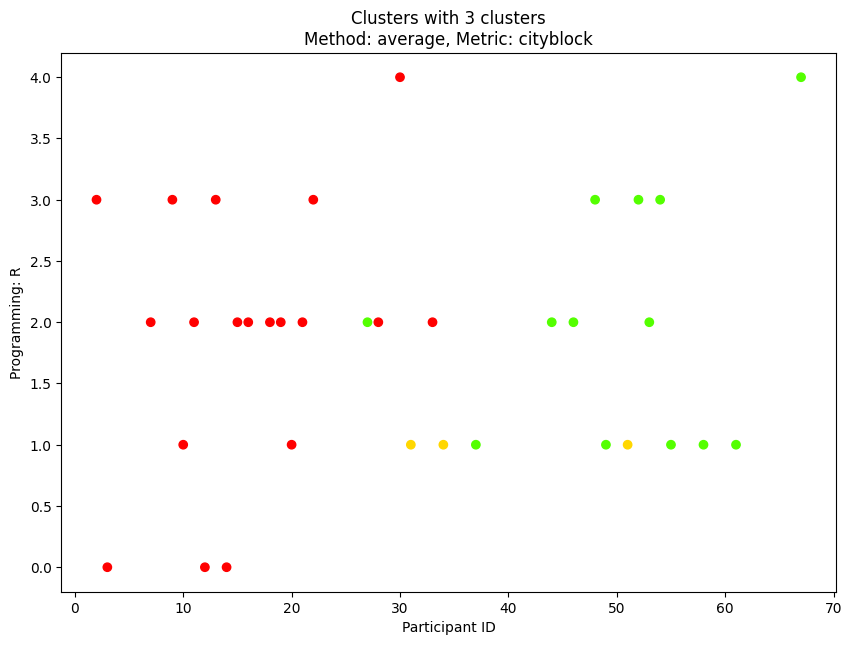

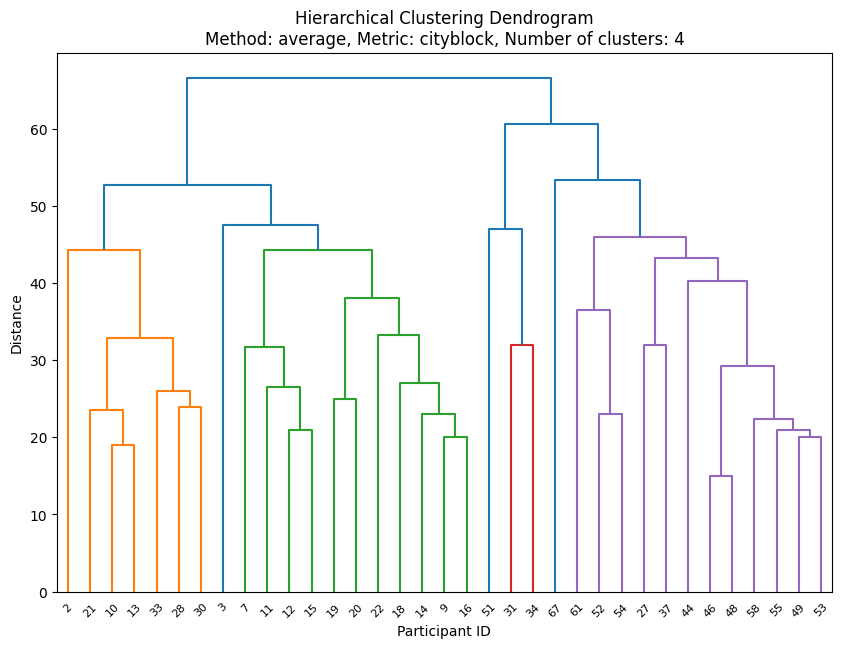

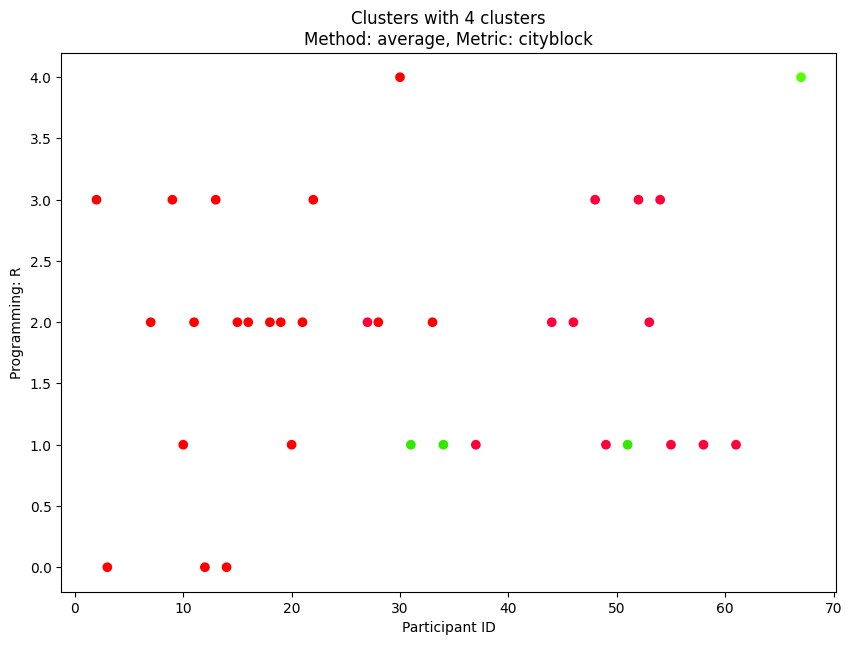

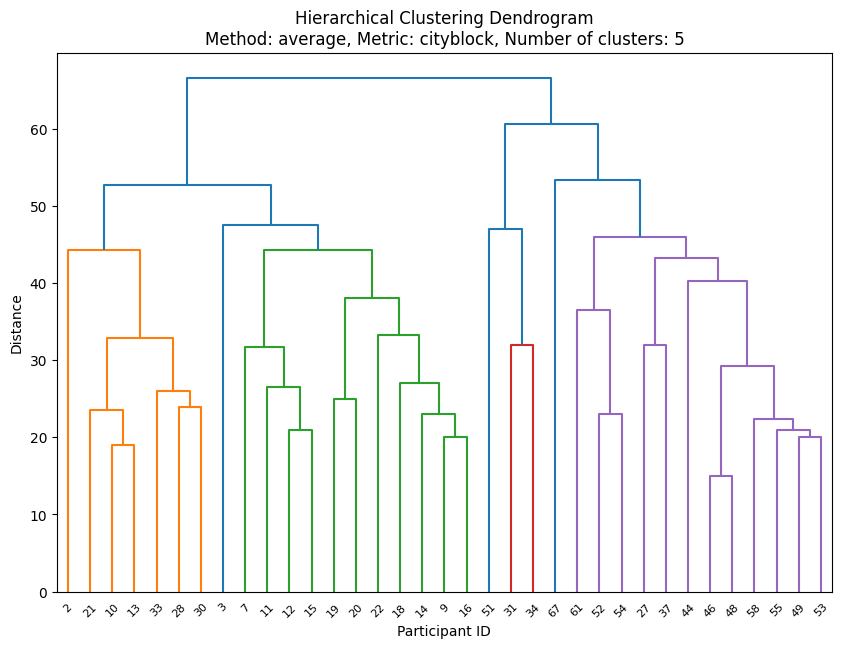

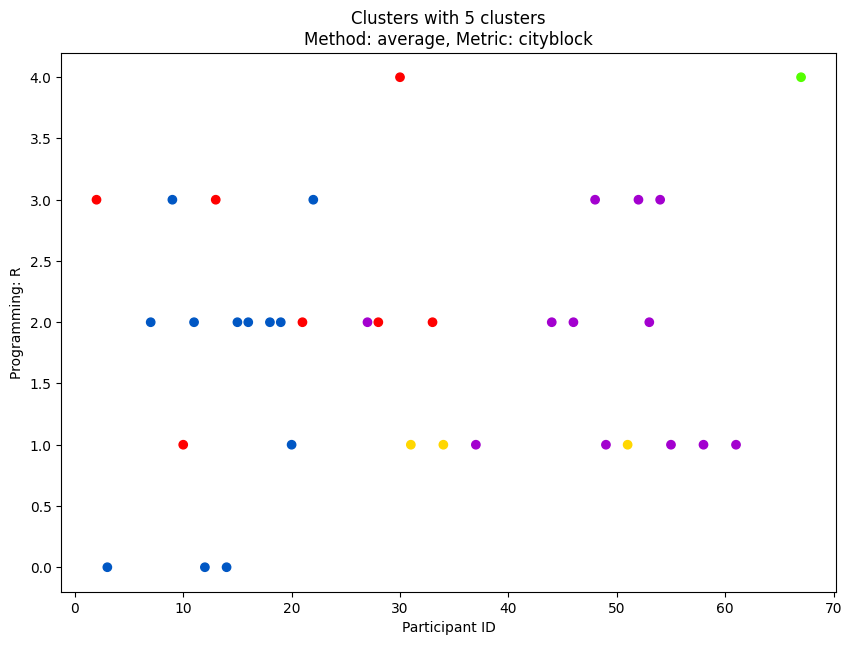

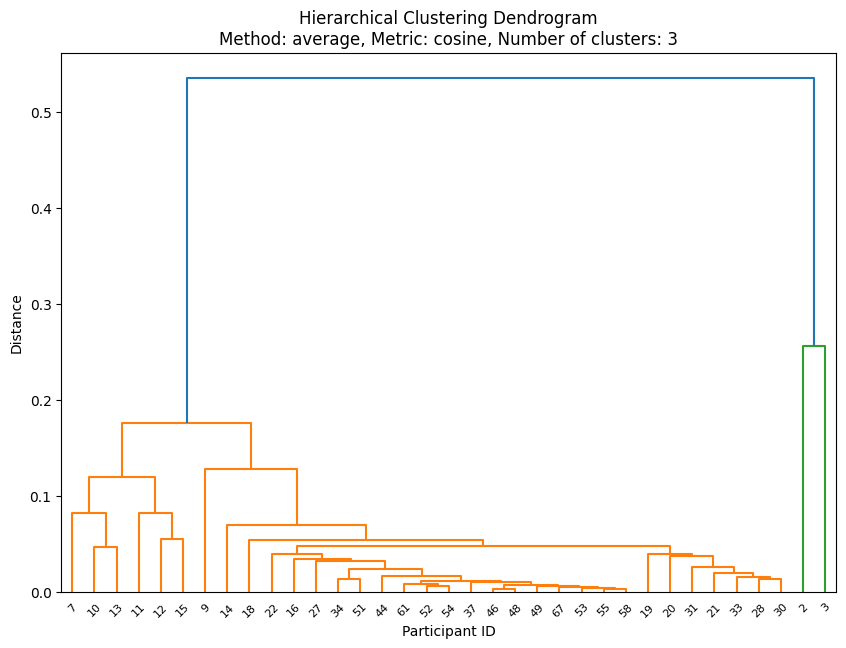

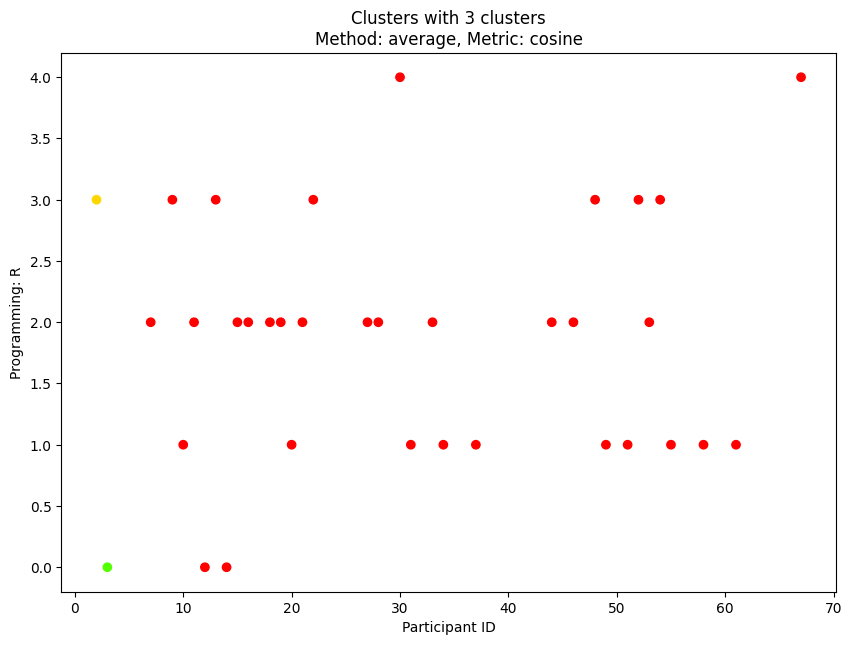

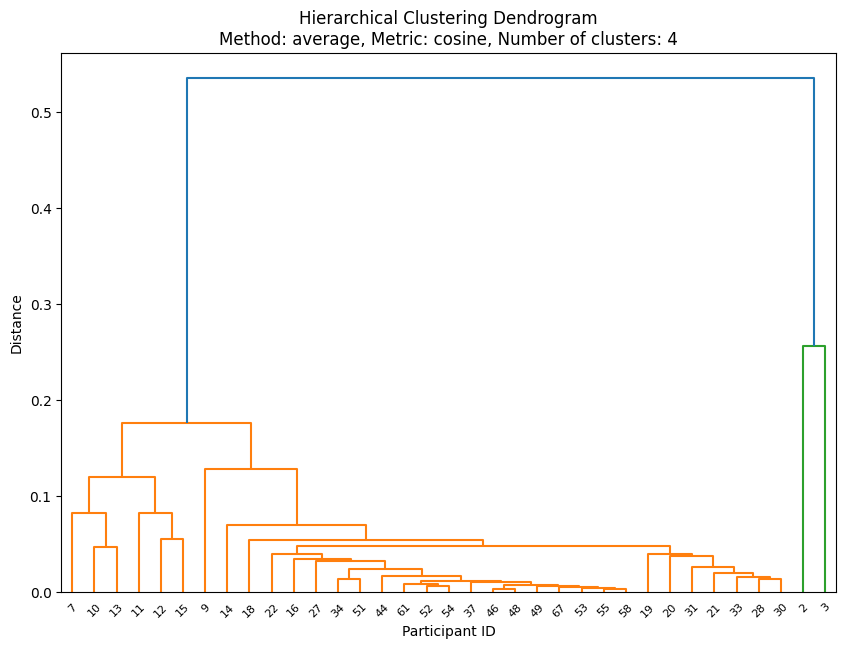

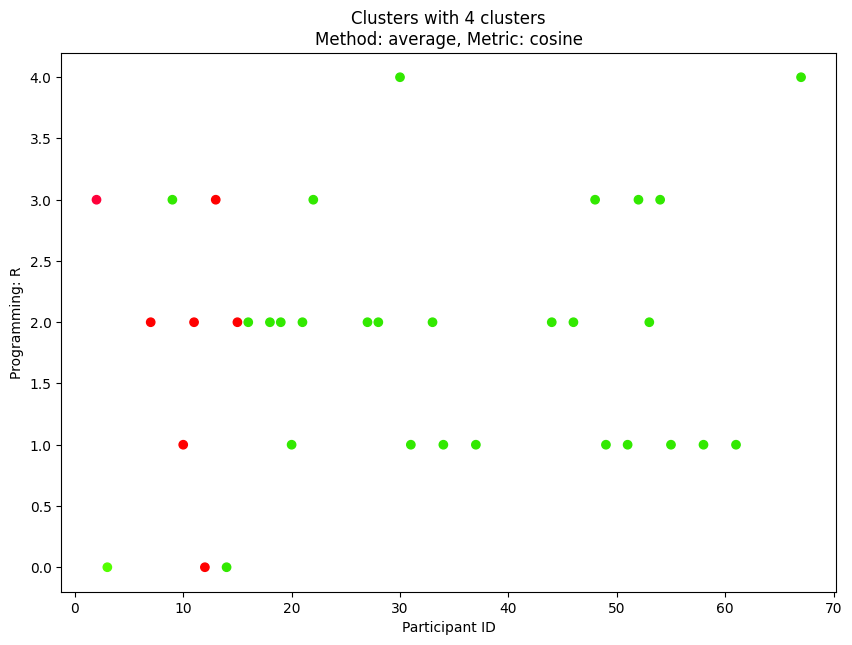

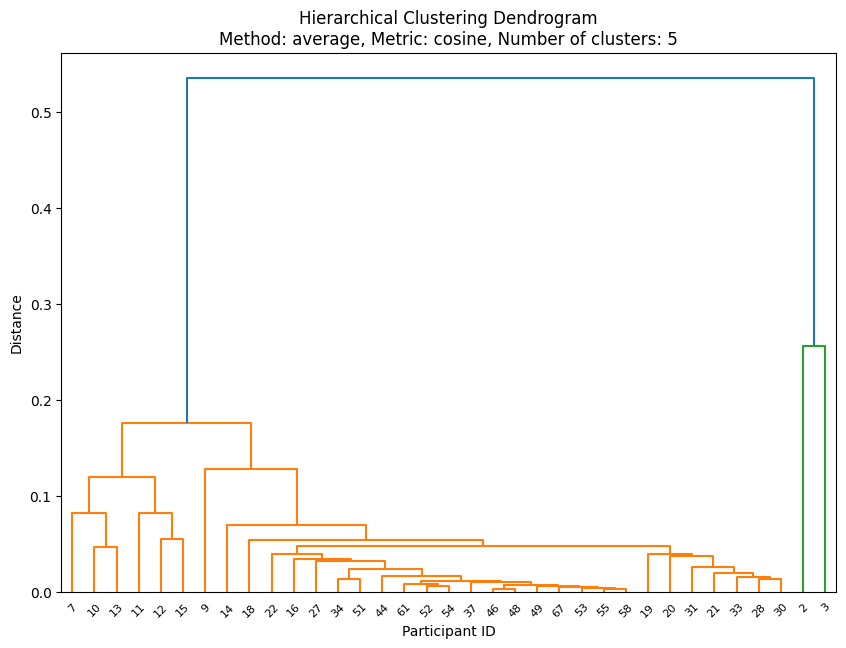

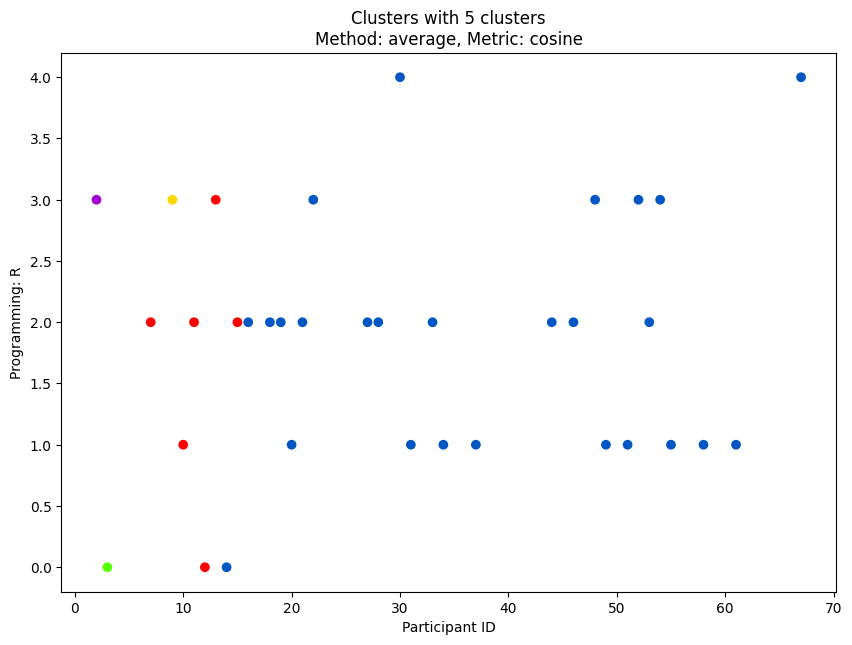

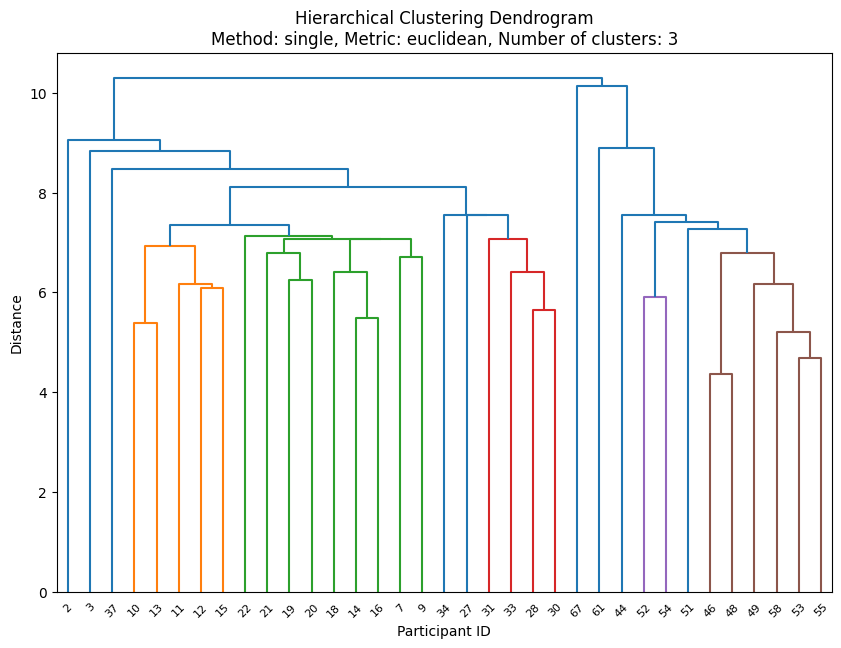

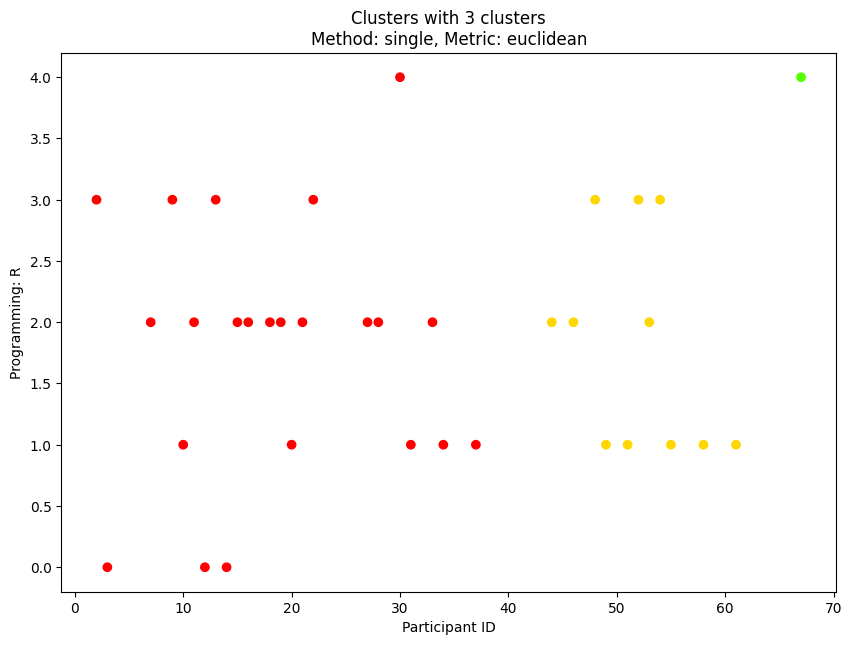

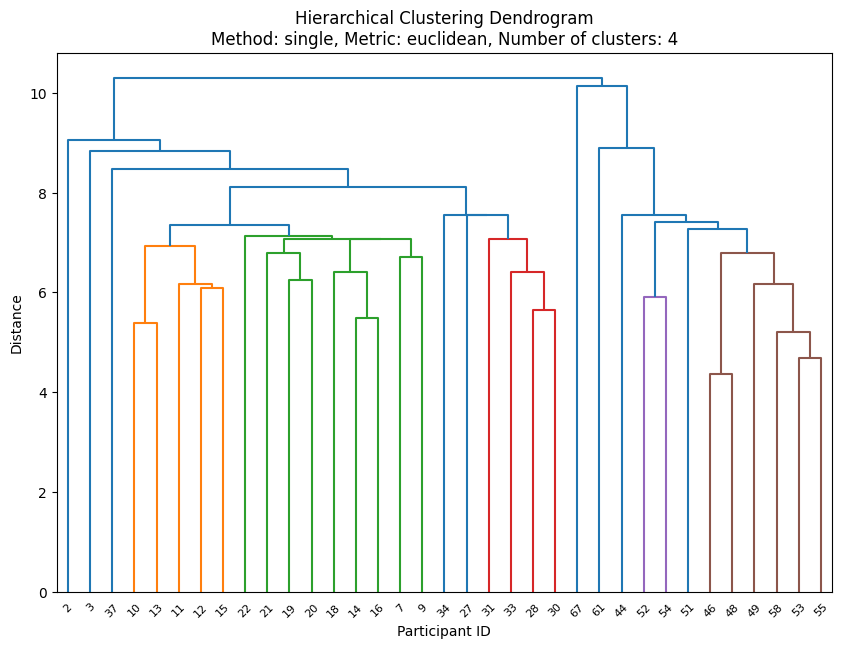

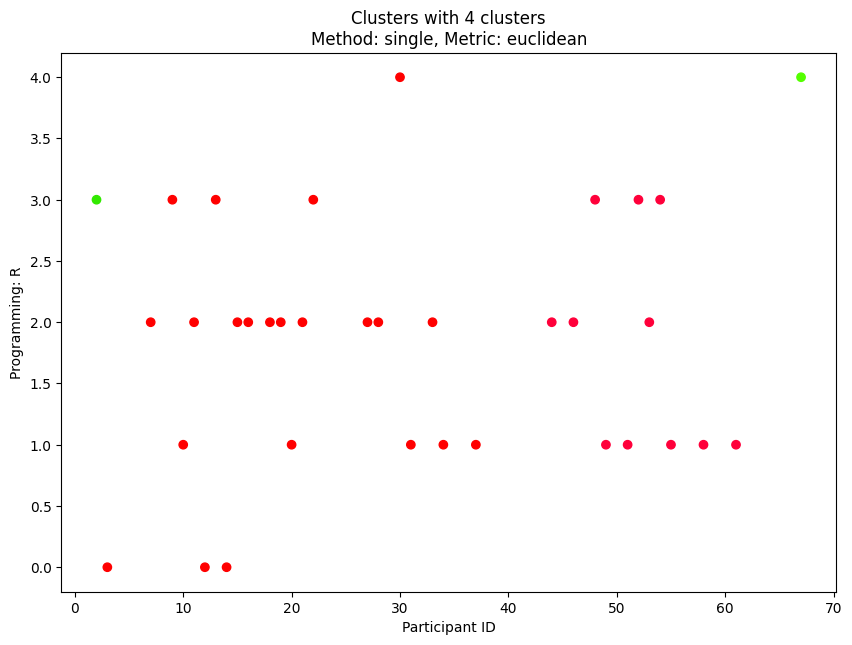

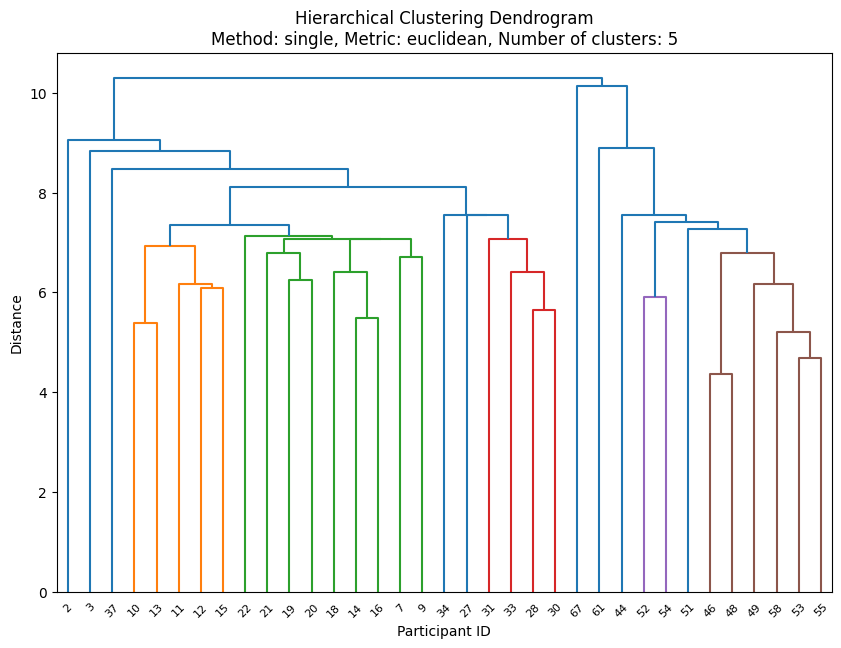

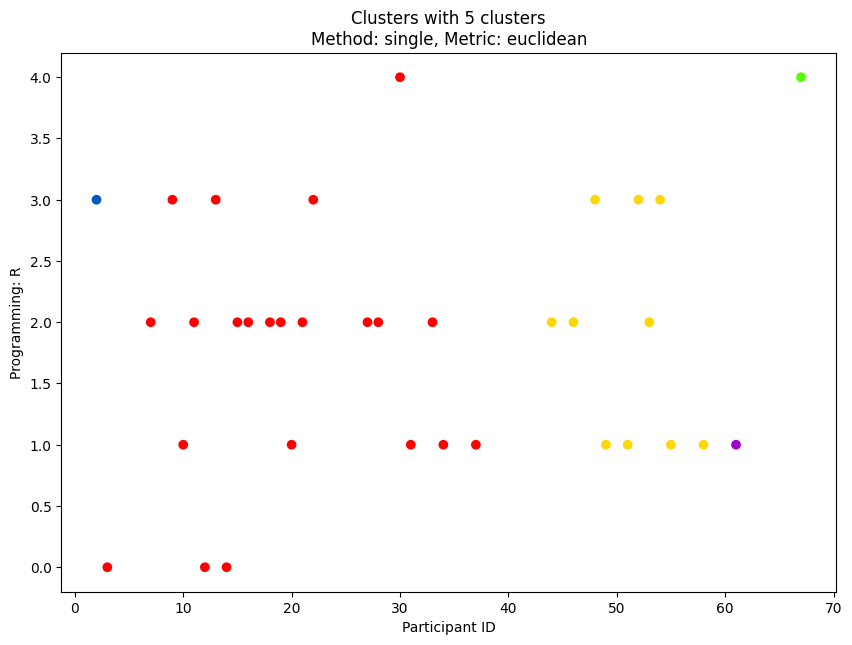

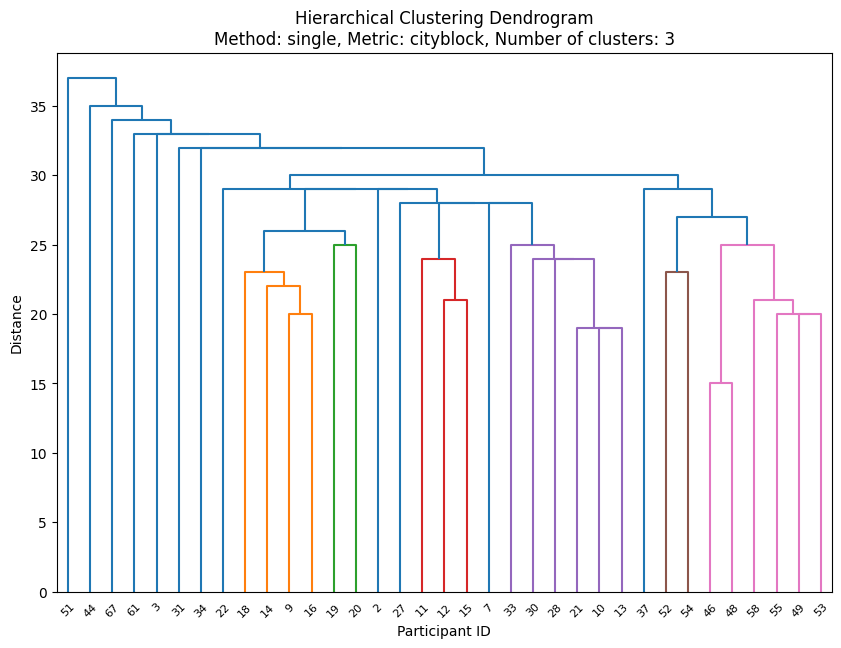

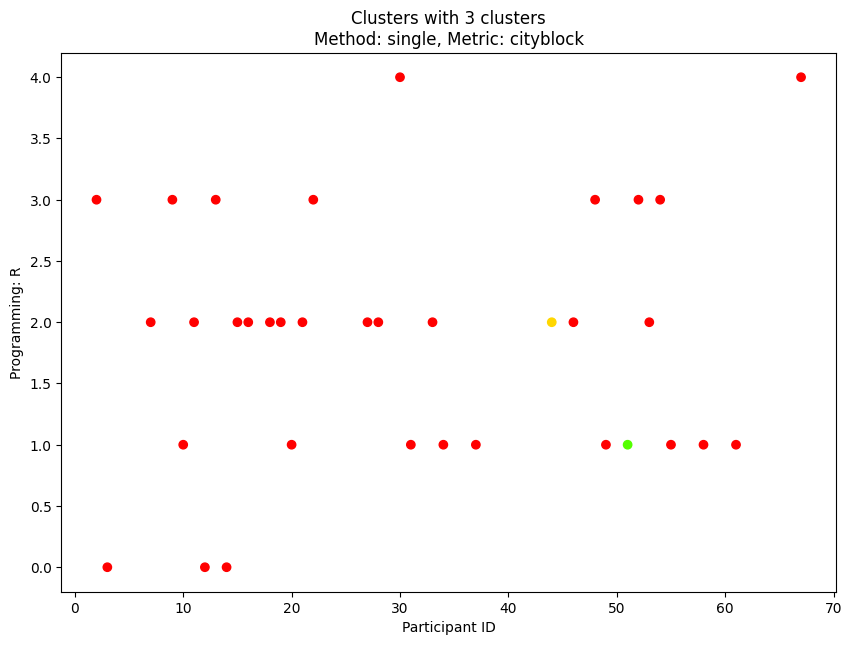

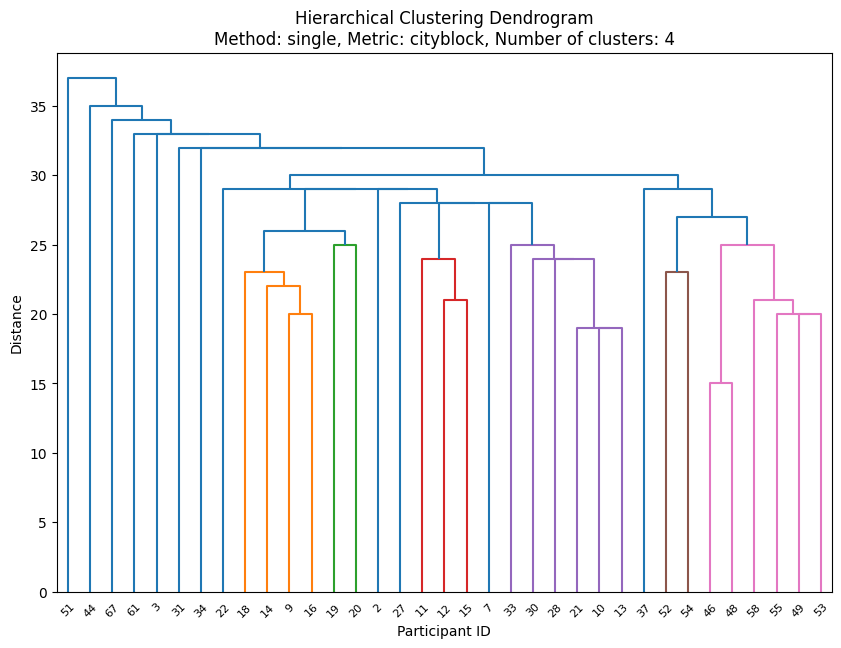

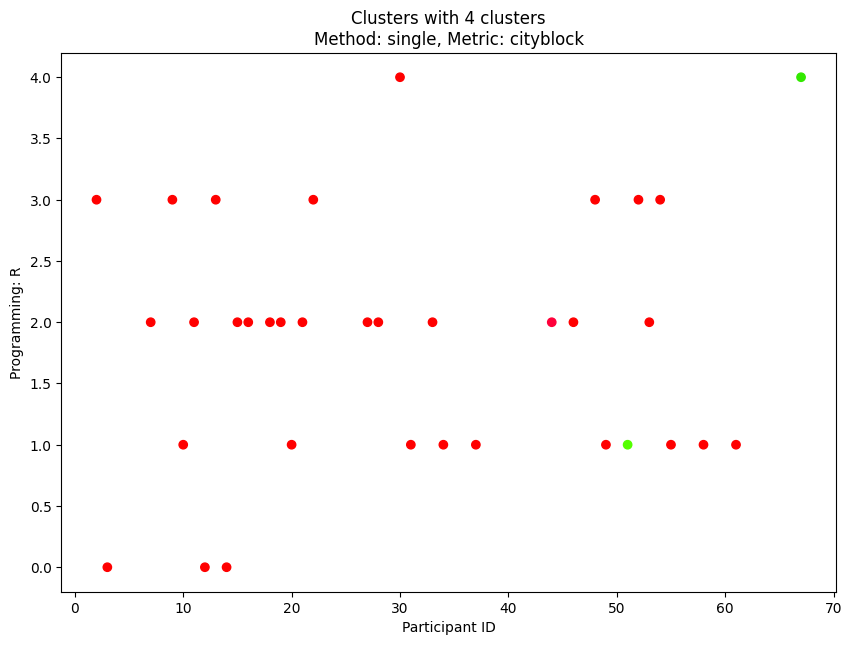

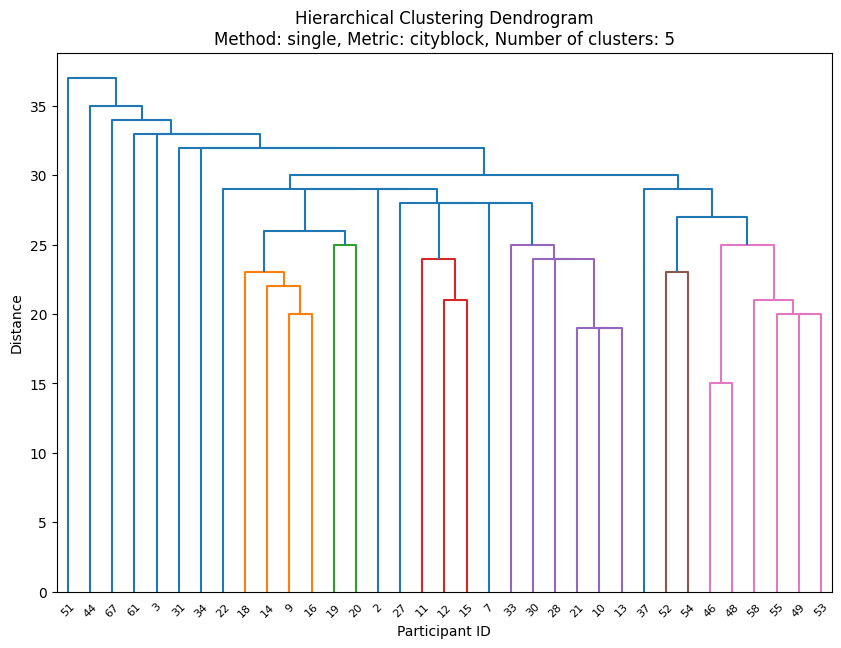

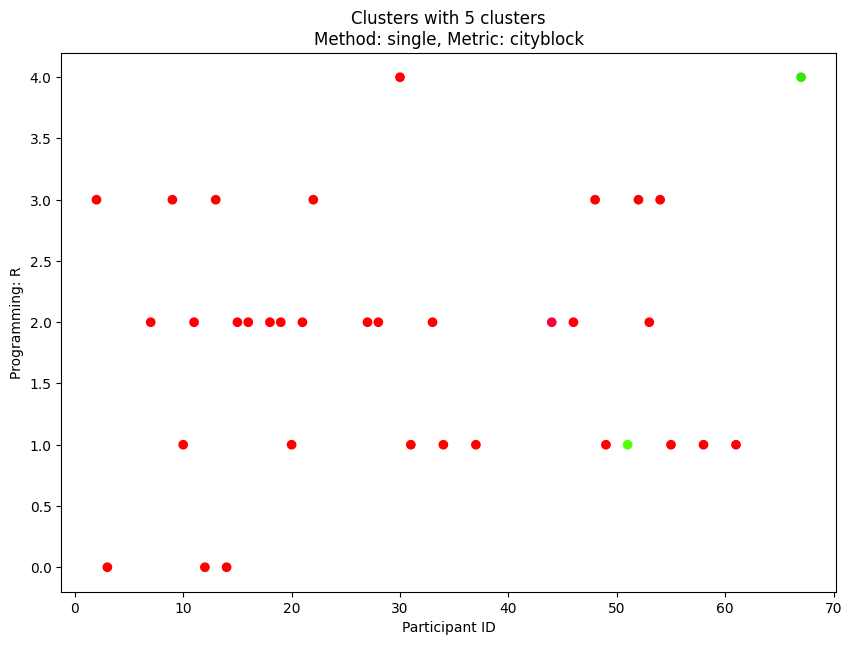

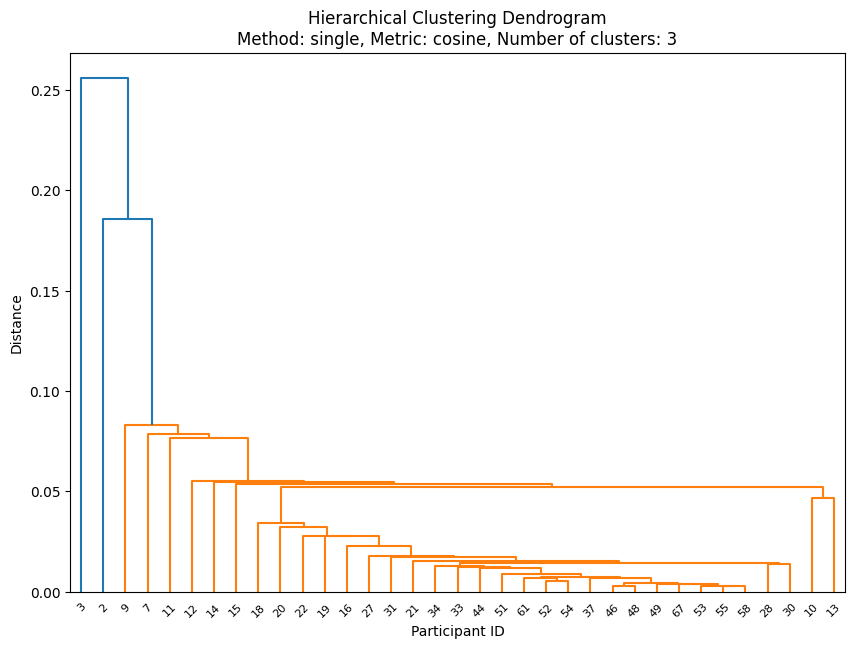

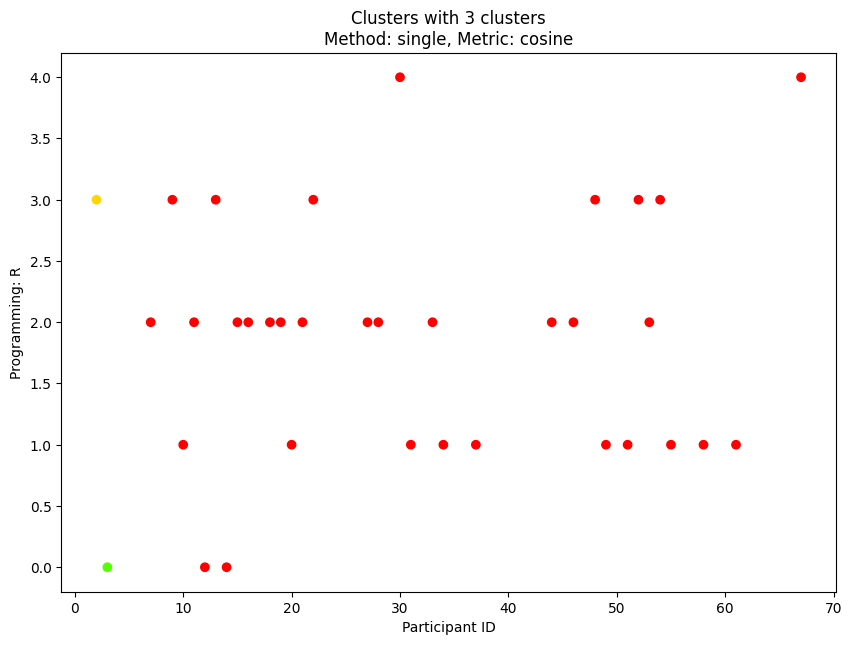

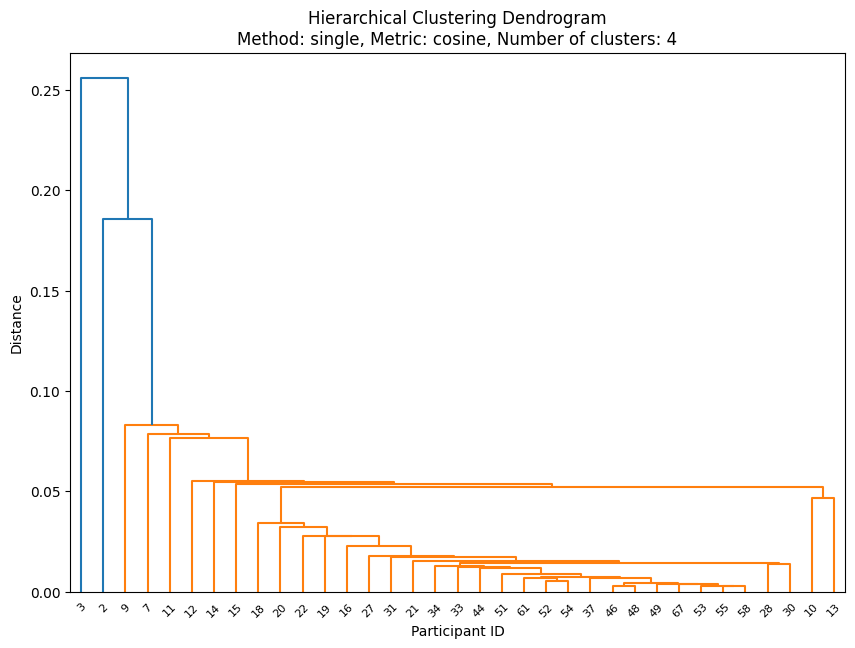

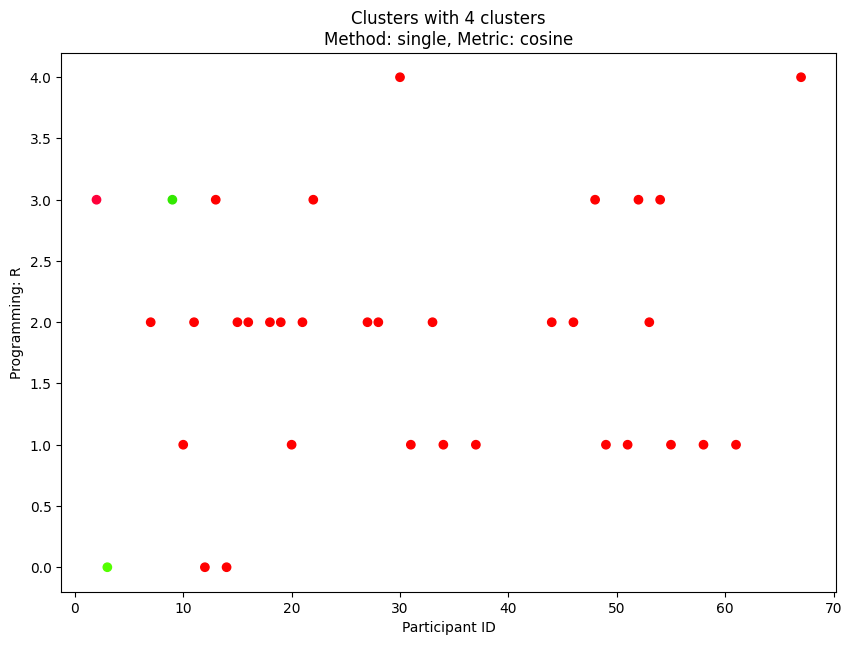

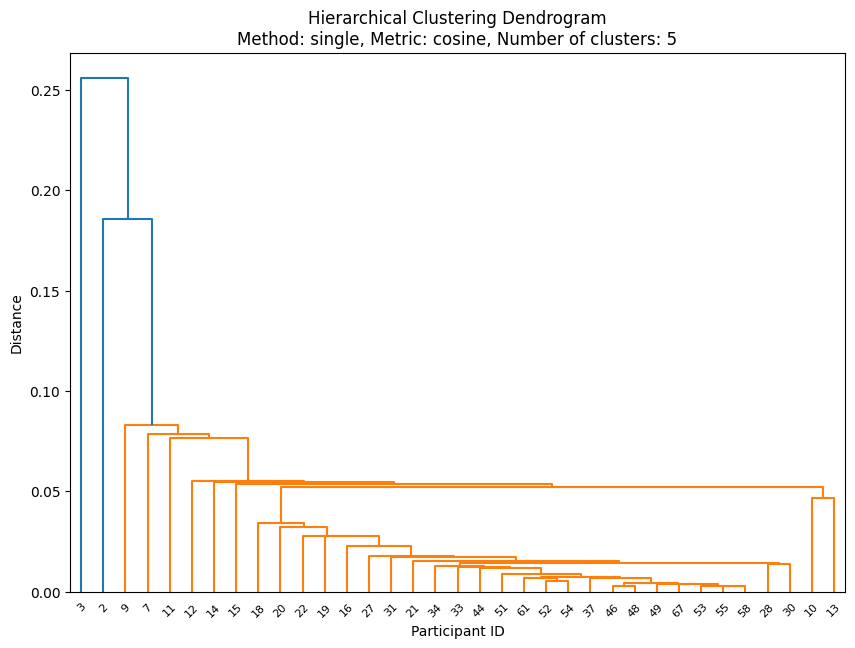

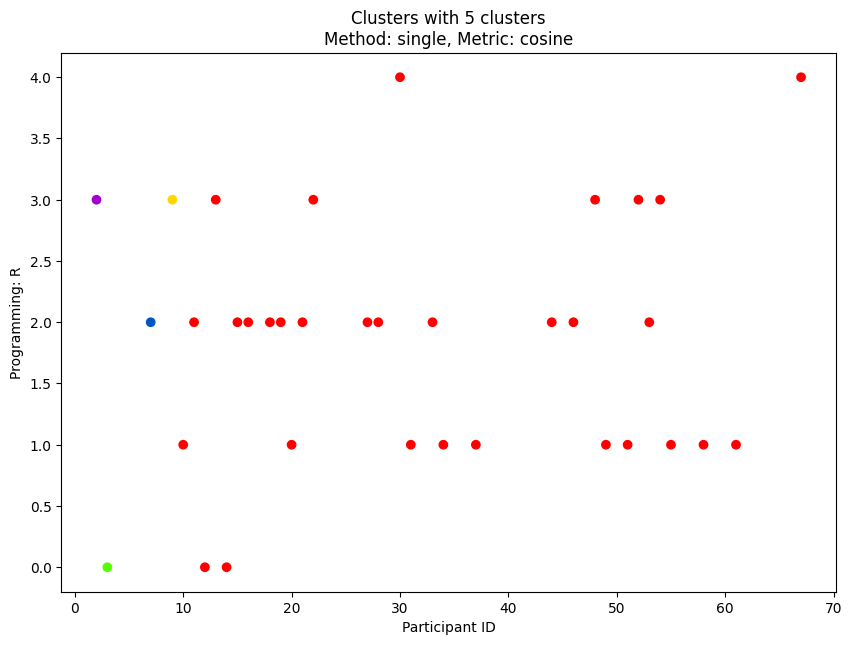

In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\xbots\Projekt-people-analytics\data\03_Processed\03_Filtered_Selected_Features.csv'
data = pd.read_csv(file_path)

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Different metrics for distance calculation
metrics = ['euclidean', 'cityblock', 'cosine']

# Number of clusters to experiment with
num_clusters_list = [3, 4, 5]

# Method for linkage
methods = ['ward', 'complete', 'average', 'single']

# Perform experiments with different metrics and number of clusters
for method in methods:
    for metric in metrics:
        if method == 'ward' and metric != 'euclidean':
            continue  # Skip incompatible combinations
        
        # Perform hierarchical clustering
        Z = linkage(numeric_data, method=method, metric=metric)
        
        for num_clusters in num_clusters_list:
            # Create clusters
            clusters = fcluster(Z, num_clusters, criterion='maxclust')
            
            # Plot the dendrogram
            plt.figure(figsize=(10, 7))
            dendrogram(Z, labels=data['Participant ID'].values)
            plt.title(f'Hierarchical Clustering Dendrogram\nMethod: {method}, Metric: {metric}, Number of clusters: {num_clusters}')
            plt.xlabel('Participant ID')
            plt.ylabel('Distance')
            plt.show()

            # Plot the clusters
            plt.figure(figsize=(10, 7))
            plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=clusters, cmap='prism')
            plt.title(f'Clusters with {num_clusters} clusters\nMethod: {method}, Metric: {metric}')
            plt.xlabel(numeric_data.columns[0])
            plt.ylabel(numeric_data.columns[1])
            plt.show()
